# Lab 5 (20-02-2024)

This lab experiments help you master how to do logistic regression.

We will be using Iris dataset and the customer info banking dataset.


In [95]:
Registration_Number = "22011103048"
Name = "Roahith R"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Roahith R and my roll no : 22011103048
Computer IP Address is: 127.0.1.1


In [96]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


## Churn detection
The dataset has 
-   1 unique identifier
-   10 features (a mix of categorical and numerical)
-   1 label (0, 1) 
The above is an classic example of binary classification problem

Expected:
1) Choose the features that matters most (use of covariance matrix)
2) Proper splitting of dataset into testing and training
3) Confusion matrix - Precision, recall, F1 score
4) Valuable data insight (some sort of visualization) using the label

In [97]:
#Load Dataset
df = pd.read_csv("Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [98]:
df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


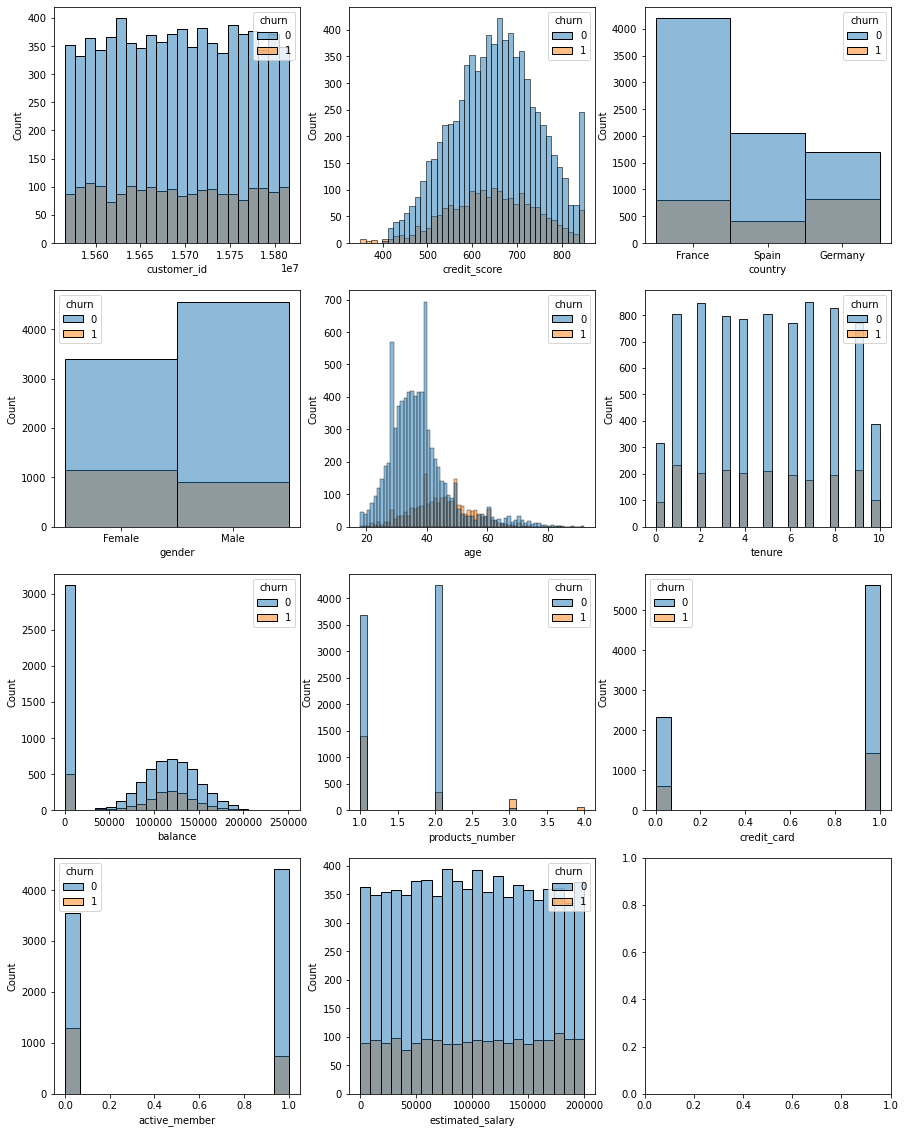

In [99]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

<AxesSubplot:>

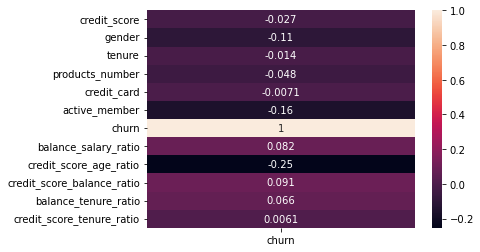

In [100]:
## Insight on Data - Choice of features

# Encoding features
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['gender'] = le.fit_transform(df['gender'])


# Combining multiple features into single feature
df['balance_salary_ratio'] = df.apply(lambda row: round(row['estimated_salary'] / row['balance'], 4) if row['balance'] != 0 else 0, axis=1)
df['credit_score_age_ratio'] = df.apply(lambda row: round(row['credit_score'] / row['age'], 4),axis=1)
df['credit_score_balance_ratio'] = df.apply(lambda row: round(row['credit_score'] / row['balance'], 4) if row['balance'] != 0 else 0, axis=1)

# Credit Score-Age Ratio
df['credit_score_age_ratio'] = df['credit_score'] / df['age']

# Balance-Tenure Ratio
df['balance_tenure_ratio'] = df.apply(lambda row: round(row['balance'] / row['tenure'], 4) if row['tenure'] != 0 else 0, axis=1)

# Credit Score-Tenure Ratio
df['credit_score_tenure_ratio'] = df.apply(lambda row: round(row['credit_score'] / row['tenure'], 4) if row['tenure'] != 0 else 0, axis=1)

# Remove  features
df.drop(['customer_id','estimated_salary', 'balance','age','country'],axis=1,inplace=True)

covariance = df.corr()['churn']
sns.heatmap(covariance.to_frame(),annot=True)


In [101]:
df.head()

,credit_score,gender,tenure,products_number,credit_card,active_member,churn,balance_salary_ratio,credit_score_age_ratio,credit_score_balance_ratio,balance_tenure_ratio,credit_score_tenure_ratio
0,619,0,2,1,1,1,1,0.0000,14.738095,0.0000,0.00,309.50
1,608,0,1,1,0,1,0,1.3429,14.829268,0.0073,83807.86,608.00
2,502,0,8,3,1,0,1,0.7136,11.952381,0.0031,19957.60,62.75
3,699,0,1,2,0,0,0,0.0000,17.923077,0.0000,0.00,699.00
4,850,0,2,1,1,1,0,0.6301,19.767442,0.0068,62755.41,425.00


In [102]:
## Logistic regression
x=df.drop('churn',axis=1)
y=df['churn']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

model1=LogisticRegression(random_state=42)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)




Accuracy = 0.8206666666666667
Precision = 0.6597222222222222
Recall = 0.16267123287671234
F1 Score = 0.260989010989011


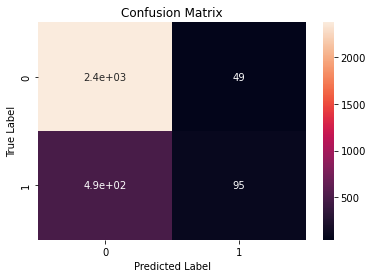

In [103]:


# Print the metrics
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")
print(f"F1 Score = {f1_score(y_test, y_pred)}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



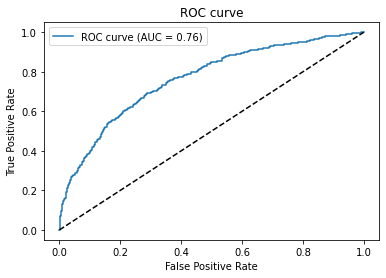

In [104]:

## Evaluating the logistic regression model
# Get the predicted probabilities for the positive class
y_pred_prob = model1.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()


## Iris Dataset - Multi-class classification

1) Use sci-kit learn inbuilt logistic regression 
2) Convert the problem into three binary classification problem. Each sub-problem predicts whether it belongs to the class or not. Finally, compare the outputs of the three classifiers to decide which class it belongs.
3) Use confusion matrix on both cases, compare the performance of the two models.



In [105]:
# Import
from sklearn.datasets import load_iris

In [106]:
# Load Dataset
data = load_iris()
df = pd.DataFrame(data = data['data'], columns = data.feature_names)
df['Target'] = data.target
# Mapping target numbers to flower names
target_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['Flower_Name'] = df['Target'].map(target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_Name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


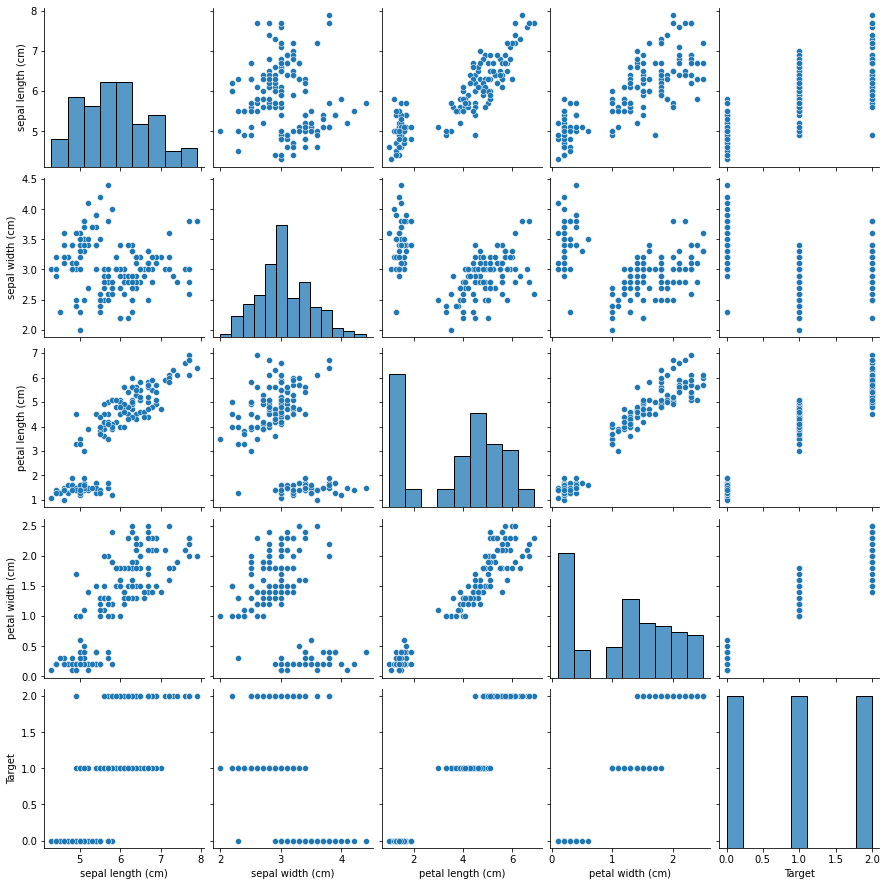

In [107]:
## Data set visualization 
sns.pairplot(df)

In [108]:
## Method 1: In-built logistic regression (multi-class classification) 
df.drop(['Flower_Name'],axis=1,inplace=True)

x = df.drop(['Target'],axis=1)
y = df['Target']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

# Logistic Regression
LogReg = LogisticRegression()
model = LogReg.fit(x_train,y_train)

# Evaluate
y_pred = model.predict(x_test)

Accuracy = 0.9333333333333333
Precision = 0.9259259259259259
Recall = 0.9444444444444445
F1 Score = 0.9280303030303031


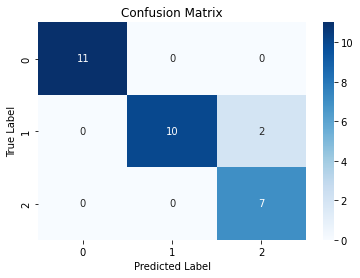

In [109]:
# Print the metrics with 'macro' averaging
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"Precision = {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall = {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score = {f1_score(y_test, y_pred, average='macro')}")

# Confusion matrix and plotting
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [110]:
## Method 2 using in-built functions (Three binary classification problems)
y_encoded = pd.get_dummies(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, train_size=0.6)

# Train three binary logistic regression models
models = []
for column in y_encoded.columns:
    LogReg = LogisticRegression()
    model = LogReg.fit(x_train, y_train[column])
    models.append(model)


# Evaluate each binary classification model and print the metrics
for i, model in enumerate(models):
    y_pred = model.predict(x_test)
    print(f"Metrics for Class {i + 1}:")
    print(f"Accuracy = {accuracy_score(y_test.iloc[:, i], y_pred)}")
    print(f"Precision = {precision_score(y_test.iloc[:, i], y_pred)}")
    print(f"Recall = {recall_score(y_test.iloc[:, i], y_pred)}")
    print(f"F1 Score = {f1_score(y_test.iloc[:, i], y_pred)}")
    print() 

Metrics for Class 1:
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0

Metrics for Class 2:
Accuracy = 0.75
Precision = 0.5833333333333334
Recall = 0.4117647058823529
F1 Score = 0.4827586206896552

Metrics for Class 3:
Accuracy = 0.9833333333333333
Precision = 1.0
Recall = 0.9375
F1 Score = 0.967741935483871

